# Part II - (Analysis of bike rides in bike sharing system)
## by (Navya)



## Investigation Overview


> The main investigation is at what hour,day,month of the year most trips are made and how the duration of the trip is related to other variables like user type,gender etc.




## Dataset Overview

> This data set includes information about 183412 individual rides made in a bike-sharing system covering the greater San Francisco Bay area.
The dataset originally contains 183412 rows and 16 columns. After wrangling and cleaning the dataset,it now contains 174952 rows and 24 columns.The columns include start time,start station and their coordinates,end time,end station and their coordinates,bike id,user type etc.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df_bike=pd.read_csv('bikedata.csv')

In [3]:
df_bike['start_time']=pd.to_datetime(df_bike['start_time'])

In [4]:
df_bike['end_time']=pd.to_datetime(df_bike['end_time'])

In [5]:
import datetime as dt
df_bike['start_day'] = df_bike['start_time'].dt.day_name()
df_bike['start_month'] = df_bike['start_time'].dt.month_name()
df_bike['start_year'] = df_bike['start_time'].dt.year
df_bike['start_hr'] = df_bike['start_time'].dt.hour
df_bike['end_day'] = df_bike['end_time'].dt.day_name()
df_bike['end_month'] = df_bike['end_time'].dt.month_name()
df_bike['end_year'] = df_bike['end_time'].dt.year
df_bike['end_hr'] = df_bike['end_time'].dt.hour

df_bike.head(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,member_gender,bike_share_for_all_trip,start_day,start_month,start_year,start_hr,end_day,end_month,end_year,end_hr
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,Male,No,Thursday,February,2019,17,Friday,March,2019,8
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,...,NaN,No,Thursday,February,2019,18,Friday,March,2019,6
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,Male,No,Thursday,February,2019,12,Friday,March,2019,5
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,Other,No,Thursday,February,2019,17,Friday,March,2019,4
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,Male,Yes,Thursday,February,2019,23,Friday,March,2019,0
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,...,Male,No,Thursday,February,2019,23,Friday,March,2019,0
6,1147,2019-02-28 23:55:35.104,2019-03-01 00:14:42.588,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,...,Female,No,Thursday,February,2019,23,Friday,March,2019,0
7,1615,2019-02-28 23:41:06.766,2019-03-01 00:08:02.756,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,...,Male,No,Thursday,February,2019,23,Friday,March,2019,0
8,1570,2019-02-28 23:41:48.790,2019-03-01 00:07:59.715,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,...,Other,No,Thursday,February,2019,23,Friday,March,2019,0
9,1049,2019-02-28 23:49:47.699,2019-03-01 00:07:17.025,19.0,Post St at Kearny St,37.788975,-122.403452,121.0,Mission Playground,37.759210,...,Male,No,Thursday,February,2019,23,Friday,March,2019,0


> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## (Visualization 1)

### Ride frequency by hours of day
#### Both the plots are multimodal distributions.The 8th,9th,17th and 18th hours have the highest number of trips. The 3rd,4th trips have the least number of trips. 
### Key Insight: 
#### This clearly tells there are high number of rides during the opening office hours and closing office hours.

Text(0.5,1,'Frequency of bike rides based on end hour of the day')

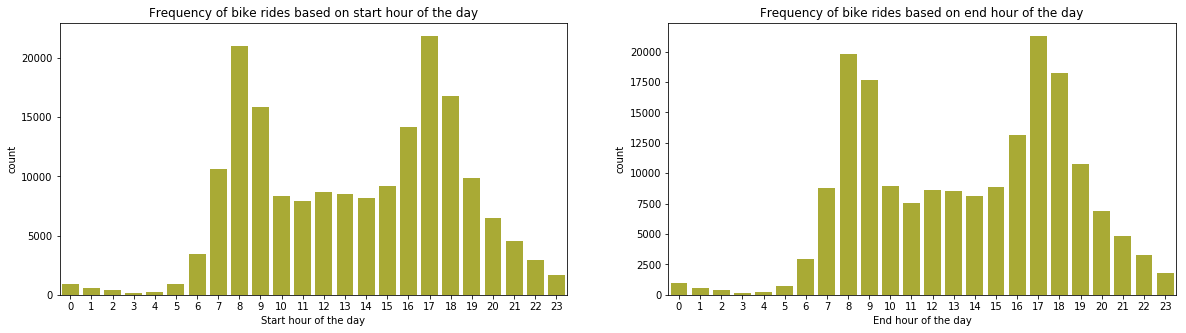

In [6]:
plt.figure(figsize=[20,5])
base_color=sb.color_palette()[8]
plt.subplot(1,2,1)
sb.countplot(data=df_bike,x='start_hr',color=base_color);
plt.xlabel('Start hour of the day')
plt.title('Frequency of bike rides based on start hour of the day')
plt.subplot(1,2,2)
sb.countplot(data=df_bike,x='end_hr',color=base_color);
plt.xlabel('End hour of the day')
plt.title('Frequency of bike rides based on end hour of the day')

## (Visualization 2)

### Ride frequency and duration of trip based on gender

### Key Insight: 
#### Though the number of higher duration trips is more for male riders but time of duration is higher for women and others.

Text(0.5,1,'Duration of the trip based on gender')

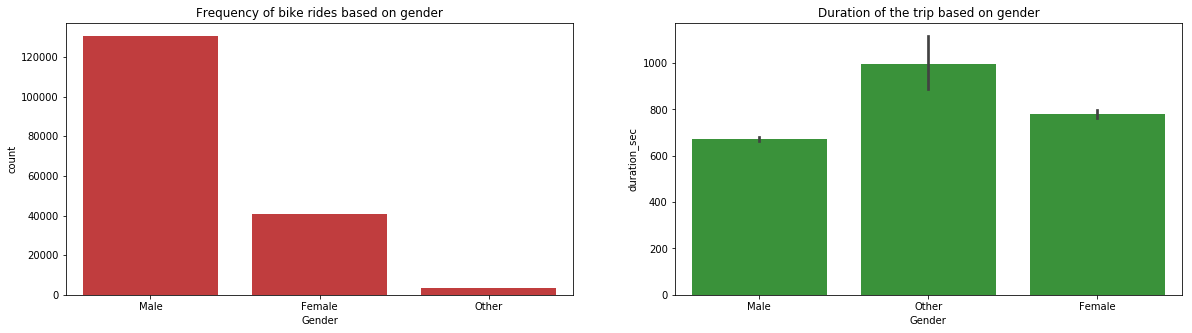

In [7]:
plt.figure(figsize=[20,5])
plt.subplot(1,2,1)
base_color=sb.color_palette()[3]
sb.countplot(data=df_bike,x='member_gender',color=base_color,order=['Male','Female','Other']);
plt.xlabel('Gender')
plt.title('Frequency of bike rides based on gender')
plt.subplot(1,2,2)
base_color=sb.color_palette()[2]
sb.barplot(data=df_bike,x='member_gender',y='duration_sec',color=base_color);
plt.xlabel('Gender')
plt.title('Duration of the trip based on gender')

## (Visualization 3)

### Ride frequency and duration of trip based on user type
#### Customers travel  longer distances on all days of the week whereas subscribers travel shorter distances.Both the user types travel more distances on weekends than on week days. However, number of trips varies exactly opposite.
### Key Insight: 
#### Customers travel longer distances than subscribers though the number of trips are only 10% of subscribers.

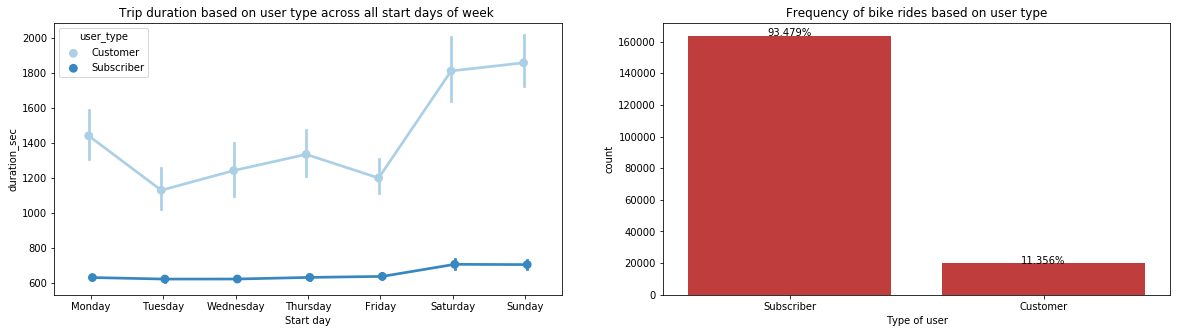

In [8]:
plt.figure(figsize=[20,5])
plt.subplot(1,2,1)
days_order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
sb.pointplot(data=df_bike,x='start_day',y='duration_sec',hue='user_type',palette='Blues',order=days_order,line_styles=" ",dodge=True);
plt.xlabel('Start day')
plt.title('Trip duration based on user type across all start days of week ')
plt.subplot(1,2,2)
base_color=sb.color_palette()[3]
ax=sb.countplot(data=df_bike,x='user_type',color=base_color,order=df_bike.user_type.value_counts().index);
plt.xlabel('Type of user')
plt.title('Frequency of bike rides based on user type')
for p in ax.patches:
    percentage = '{:.3f}%'.format(100 * p.get_height()/174952)
    x = p.get_x() + p.get_width()/2
    y = p.get_height()
    ax.annotate(percentage,(x,y),ha='center')
plt.show()

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [9]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_Bikedata_analysis_explanatory.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_Bikedata_analysis_explanatory.ipynb to slides
[NbConvertApp] Writing 375967 bytes to Part_II_Bikedata_analysis_explanatory.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "/opt/conda/bin/jupyter-nbconvert", line 11, in <module>
    sys.exit(main())
  File "/opt/conda/lib/python3.6/site-packages/jupyter_core/application.py", line 266, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "/opt/conda/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/opt/conda/lib/python3.6/site-packages/nbconvert/nbconvertapp.py", line 337, in start
    self.convert_notebooks()
  File "/opt/conda/lib/python3.6/site-packages/nbconvert/nbconvertapp.py", line 507, in convert_notebooks
    self.convert_single_notebook(notebook_filename)
  File "/opt/c

> In the classroom workspace, the generated HTML slideshow will be placed in the home folder. 

> In local machines, the command above should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 

### Submission
If you are using classroom workspace, you can choose from the following two ways of submission:

1. **Submit from the workspace**. Make sure you have removed the example project from the /home/workspace directory. You must submit the following files:
   - Part_I_notebook.ipynb
   - Part_I_notebook.html or pdf
   - Part_II_notebook.ipynb
   - Part_I_slides.html
   - README.md
   - dataset (optional)


2. **Submit a zip file on the last page of this project lesson**. In this case, open the Jupyter terminal and run the command below to generate a ZIP file. 
```bash
zip -r my_project.zip .
```
The command abobve will ZIP every file present in your /home/workspace directory. Next, you can download the zip to your local, and follow the instructions on the last page of this project lesson.
